# Ordinary Least Squares (OLS) Linear Regression

In [1]:
from esda.moran import Moran
import geopandas as gpd
from libpysal.weights import DistanceBand, KNN
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from splot.esda import plot_moran
import sys

sys.path.append("..")
from statshelper import q_q_plot
plt.style.use('dark_background')

In [2]:
df = pd.read_csv("../data/processed/Cleaned_Chicago_Sales.csv")
df.head()

,Unnamed: 0,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Type of Residence,Apartments,Wall Material,Roof Material,...,Bool-Type of Residence-1,Bool-Type of Residence-2,Bool-Type of Residence-4,Bool-Type of Residence-8,Bool-Type of Residence-7,Bool-Type of Residence-6,Bool-Wall Material-2,Bool-Wall Material-3,Bool-Wall Material-1,Bool-Wall Material-4
0,2,16094150130000,211,13,-0.297580,77,3.0,6.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,0
1,5,4252000820000,204,100,2.868180,25,5.0,0.0,2.0,4.0,...,0,0,0,0,0,0,1,0,0,0
2,8,14322110150000,208,12,-0.596010,74,3.0,0.0,2.0,6.0,...,0,0,0,0,0,0,1,0,0,0
3,9,27021200080000,204,34,1.698873,28,1.0,0.0,3.0,1.0,...,1,0,0,0,0,0,0,1,0,0
4,11,13121080620000,204,42,0.515768,71,1.0,0.0,2.0,1.0,...,1,0,0,0,0,0,1,0,0,0


This is a common set of quantitiative variables shared across all of these models. Note that only non-spatial models use Latitude and Longitude as a dependent variable as spatial models account for space explicitly.

In [3]:
i_vars = [
    'Age',
    'Bedrooms',  
    'Building Square Feet', 
    'Estimate (Building)', 
    'Estimate (Land)', 
    'Fireplaces', 
    'Full Baths',
    'Garage 1 Area',
    'Garage 2 Area', 
    'Half Baths', 
    'Land Square Feet',
    'Latitude',
    'Longitude',
    'Rooms',
    'Sale Quarter'
    ]
dep_var = ['Sale Price']
X = df[i_vars]
y = df[dep_var]

Add a constant for the intercept and calculate the OLS fit for our model.

In [4]:
X_cons = sm.add_constant(X)
ols = sm.OLS(y, X_cons, name_y=dep_var, name_x=i_vars).fit()
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Sale Price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 4.527e+04
Date:                Tue, 04 May 2021   Prob (F-statistic):               0.00
Time:                        21:57:43   Log-Likelihood:            -2.7698e+05
No. Observations:              324261   AIC:                         5.540e+05
Df Residuals:                  324245   BIC:                         5.542e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -66.0664      0.753    -87.699      0.000     -67.543     -64.590
Age                     -0.1345      0.001   -103.333      0.000      -0.137      -0.132
Bedrooms                -0.0039      0.002     -1.891      0.059      -0.008       0.000
Building Square Feet     0.0524      0.002     22.148      0.000       0.048       0.057
Estimate (Building)      0.4075      0.002    232.260      0.000       0.404       0.411
Estimate (Land)          0.3503      0.002    212.996      0.000       0.347       0.354
Fireplaces               0.0193      0.001     15.530      0.000       0.017       0.022
Full Baths              -0.0022      0.002     -1.224      0.221      -0.006       0.001
Garage 1 Area            0.0418      0.001     39.911      0.000       0.040       0.044
Garage 2 Area           -0.0003      0.001     -0.273      0.785      -0.002       0.002
Half Baths               0.0250      0.001     21.381      0.000       0.023       0.027
Land Square Feet        -0.0873      0.001    -60.961      0.000      -0.090      -0.084
Latitude                 0.6684      0.010     70.328      0.000       0.650       0.687
Longitude               -0.4339      0.011    -39.911      0.000      -0.455      -0.413
Rooms                    0.0110      0.002      4.678      0.000       0.006       0.016
Sale Quarter             0.1169      0.001    116.152      0.000       0.115       0.119
==============================================================================
Omnibus:                    46008.207   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           178882.880
Skew:                          -0.676   Prob(JB):                         0.00
Kurtosis:                       6.378   Cond. No.                     7.34e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.34e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above we see that the coefficients of Bedrooms, Full Baths, and Garage 2 Area are not statistically significant at the 95% level. Disregarding these varaibles, we see that most of the dependent variables have a positive relationship with Sales Price with the exception of `Age`, `Land Square Feet`, and `Longitude`. It makes sense that older properties and those further from the lake would fetch a smaller price, but the `Land Square Feet` result is very curious. I would guess that it occurs because larger properties tend to lie further from downtown, but that is just a guess.

Taking a quick look at the models' fit:

* we see that the adjusted $R^2$ is 0.677 meaning that our dependent variables are able to explain 67% of the variation in the Sale Price. * We also note that the AIC is quite large. This is a relative value so we have to compare it against other models, but not a great sign for our model. 
* The `Prob(Omnibus)` value should be close to one if the residuals are normally distributed so we can be sure that they are not. 
* `Durbin-Watson` tells us that since our data is between 1-2 we do not have problems with heteroscedasticity.

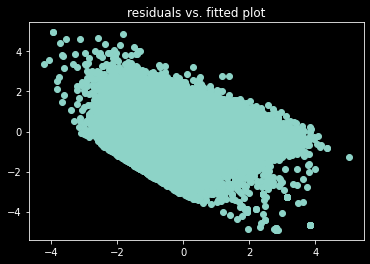

In [5]:
plt.scatter(ols.predict(), ols.resid)
plt.title("residuals vs. fitted plot")
plt.show()

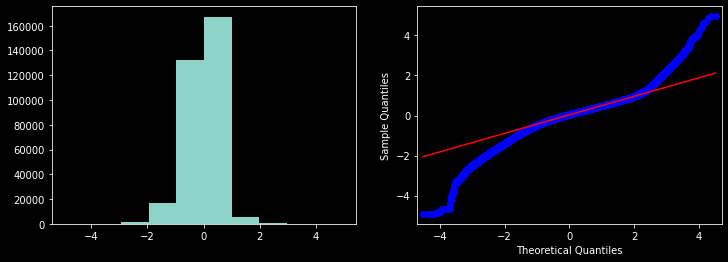

In [6]:
q_q_plot(ols.resid)

In the above two cells, we plot the residuals vs. fitted plot and check the normality of the residuals. The residuals vs. fitted plot doesn't look very good as we have a clear downward trend. The histogram makes the residuals appear approximately equal, but the Q-Q plot shows that this is not the case.

In [7]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitude, df.Latitude))
gdf = gdf.set_crs("EPSG:4326")
gdf = gdf.to_crs("EPSG:26916")

Text(0.5, 1.0, 'Residuals')

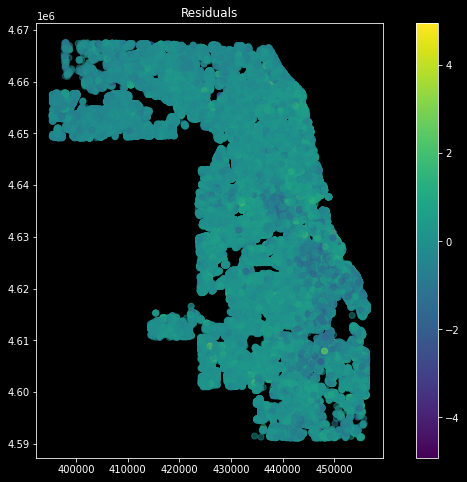

In [8]:
gdf.plot(column=ols.resid, legend=True,
         alpha=0.5, figsize=(12,8))
plt.title("Residuals")
plt.show()

From the map of the residuals above we can see some areas of clustered lowe residuals (dark spots), but to be more formal we should calculate Moran's I.

In [9]:
#w = DistanceBand.from_dataframe(gdf,threshold=800)
w = KNN.from_dataframe(gdf,k=256) # needed k large enough that it was connected
w.transform = 'R'

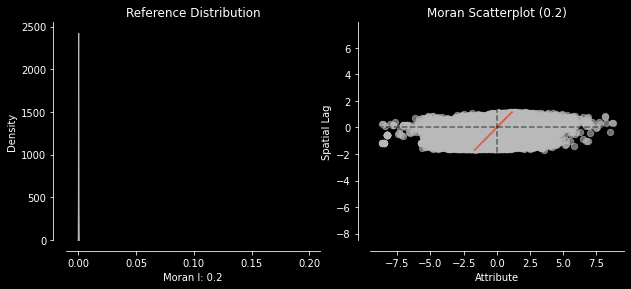

In [10]:
ols_moran = Moran(ols.resid, w, permutations=199)
plot_moran(ols_moran, zstandard=True, figsize=(10,4))
plt.show()

The Moran's I of the residuals is 0.2 which indicates that the residuals exhibit positive spatial autocorrelation.